In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import insightface
from insightface.app import FaceAnalysis
from insightface.data import get_image as ins_get_image

In [2]:
print('insightface', insightface.__version__)
print('numpy', np.__version__)

insightface 0.7.3
numpy 1.24.3


# Step 1. Detect Faces

### Import Detection Model 
* https://github.com/deepinsight/insightface/tree/master/model_zoo#0-python-package-models

In [3]:
app = FaceAnalysis(name='buffalo_l')
app.prepare(ctx_id=0, det_size=(640,640))

/Users/emersondelemmus/Documents/Insight_Face/.insightface_venv/lib/python3.10/site-packages/onnxruntime/capi/onnxruntime_inference_collection.py:65: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'CPUExecutionProvider'
  warnings.warn(


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/emersondelemmus/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/emersondelemmus/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/emersondelemmus/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/emersondelemmus/.insightface/models/buffalo_l/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/emersondelemmus/.insightface/models/buffalo_l/w600k_r50.onn

### Display image

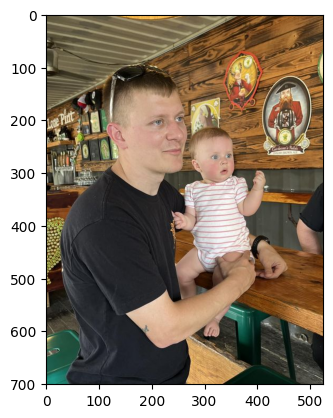

In [4]:
img = cv2.imread('troy_and_baby.jpeg')
plt.imshow(img[:,:,::-1])
plt.show()

### Detect Faces

In [5]:
# List of faces in image
faces = app.get(img)

/Users/emersondelemmus/Documents/Insight_Face/.insightface_venv/lib/python3.10/site-packages/insightface/utils/transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


In [6]:
# Contains 2 faces 
len(faces)

2

In [7]:
# Face Dictionary
faces[0].keys()

dict_keys(['bbox', 'kps', 'det_score', 'landmark_3d_68', 'pose', 'landmark_2d_106', 'gender', 'age', 'embedding'])

In [8]:
# Face Details
faces[1]

{'bbox': array([150.67065, 140.67523, 266.0915 , 298.16403], dtype=float32),
 'kps': array([[212.21553, 206.1915 ],
        [253.26245, 199.83266],
        [255.39522, 231.97643],
        [221.01576, 262.051  ],
        [254.4828 , 256.8416 ]], dtype=float32),
 'det_score': 0.80203164,
 'landmark_3d_68': array([[ 1.43551102e+02,  2.10023178e+02,  2.75907650e+01],
        [ 1.47829346e+02,  2.26961166e+02,  2.88988609e+01],
        [ 1.53078171e+02,  2.44170593e+02,  2.92069187e+01],
        [ 1.60725113e+02,  2.60561371e+02,  2.75955601e+01],
        [ 1.74335175e+02,  2.75031860e+02,  2.16216946e+01],
        [ 1.89252365e+02,  2.85121002e+02,  1.82025986e+01],
        [ 2.04367035e+02,  2.92205200e+02,  1.54766045e+01],
        [ 2.23773834e+02,  2.96698212e+02,  1.04304714e+01],
        [ 2.43920868e+02,  2.99159424e+02,  1.83740578e+01],
        [ 2.52078400e+02,  2.93288757e+02,  3.78849716e+01],
        [ 2.49053772e+02,  2.84733032e+02,  5.86283989e+01],
        [ 2.46883179e+02

# Crop and Plot Faces

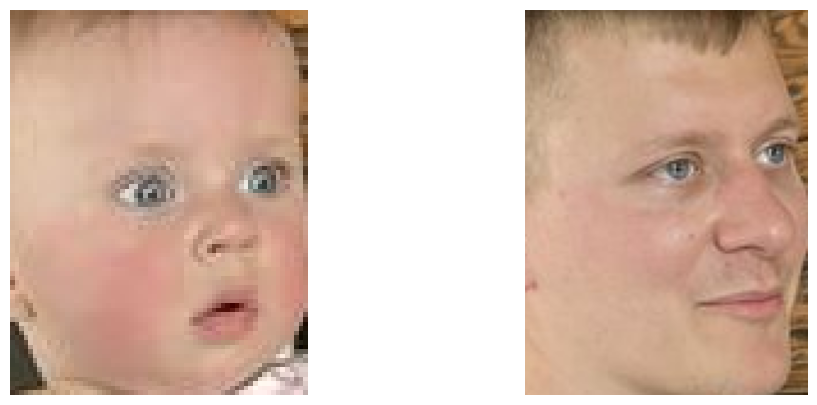

In [9]:
img = cv2.imread('troy_and_baby.jpeg')

fig, axs = plt.subplots(1,2, figsize=(12,5))

for i, face in enumerate(faces):
    bbox=face['bbox']
    bbox=[int(b) for b in bbox]
    axs[i].imshow(img[bbox[1]:bbox[3], bbox[0]:bbox[2],::-1])
    axs[i].axis('off')

# Step 2: Face Swapping

### Initialze swapper model
* https://drive.google.com/file/d/1krOLgjW2tAPaqV-Bw4YALz0xT5zlb5HF/view

In [10]:
swapper = insightface.model_zoo.get_model('inswapper_128.onnx',
                                         download=False,
                                         download_zip=False)

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
inswapper-shape: [1, 3, 128, 128]


##### Face we want to swap in

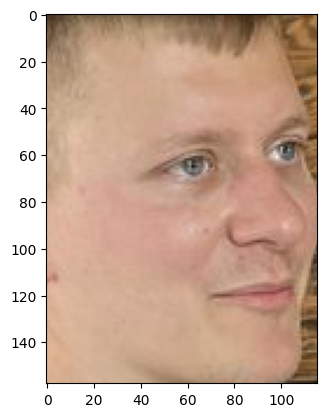

In [11]:
source_face = faces[1]
bbox=source_face['bbox']
bbox=[int(b) for b in bbox]
plt.imshow(img[bbox[1]:bbox[3], bbox[0]:bbox[2],::-1])
plt.show()

#### Create a copy of the base image and then swap the source face in

In [12]:
res = img.copy()
for face in faces:
    res=swapper.get(res, face, source_face, paste_back=True)

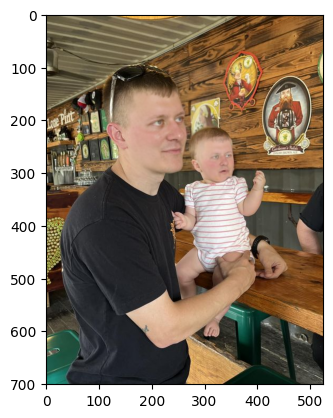

In [13]:
plt.imshow(res[:,:,::-1])
plt.show()

#### Display the new faces

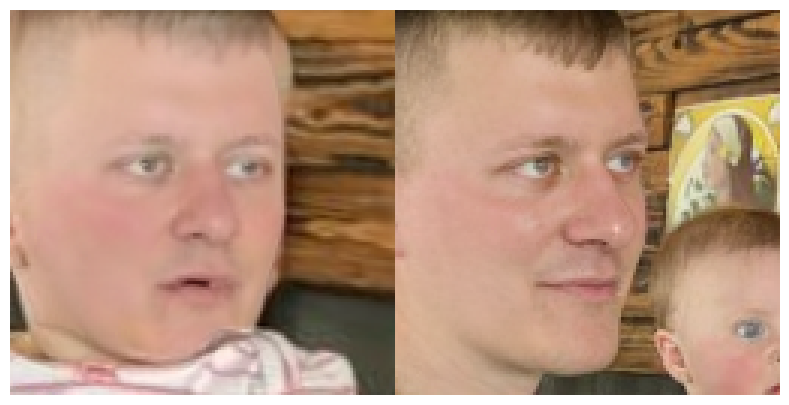

In [14]:
res =[]
for face in faces:
    _img, _ = swapper.get(img,face,source_face,paste_back=False)
    res.append(_img)
res=np.concatenate(res,axis=1)
fig, ax = plt.subplots(figsize=(15,5))
plt.imshow(res[:,:,::-1])
ax.axis('off')
plt.show()

# Sample: swap 2 faces in 1 images

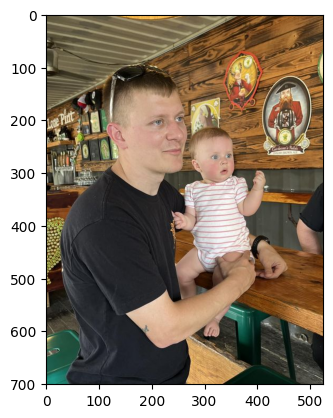

In [15]:
troy = cv2.imread('troy_and_baby.jpeg')
plt.imshow(troy[:,:,::-1])
plt.show()

In [16]:
def swap_n_show_same_img(img1_fn,
                        app,
                        swapper,
                        plot_before=False,
                        plot_after=True):
    img1=cv2.imread(img1_fn)
    #img2=cv2.imread(img2_fn)
    
    if plot_before: 
        fig, axs = plt.subplots(1,2, figsize=(10,5))
        axs[0].imshow(img1[:,:,::-1])
        axs[0].axis('off')
        #axs[1].imshow(img2[:,:,::-1])
        #axs[1].axis('off')
        plt.show()
        
    
    face1=app.get(img1)[0]
    face2=app.get(img1)[1]
    #face2=app.get(img2)[0]
    
    img1_ = img1.copy()
    #img2_ = img2.copy()
    
    if plot_after:
        img1_ = swapper.get(img1_, face1, face2, paste_back=True)
        #img2_ = swapper.get(img2_, face2, face1, paste_back=True)
        fig, axs = plt.subplots(1,2, figsize=(10,5))
        axs[0].imshow(img1[:,:,::-1])
        axs[0].axis('off')
        #axs[1].imshow(img2[:,:,::-1])
        #axs[1].axis('off')
        plt.show()
        
    return img1_#, img2_

In [17]:
from glob import glob
pictures = glob('troy_and_baby.jpeg')

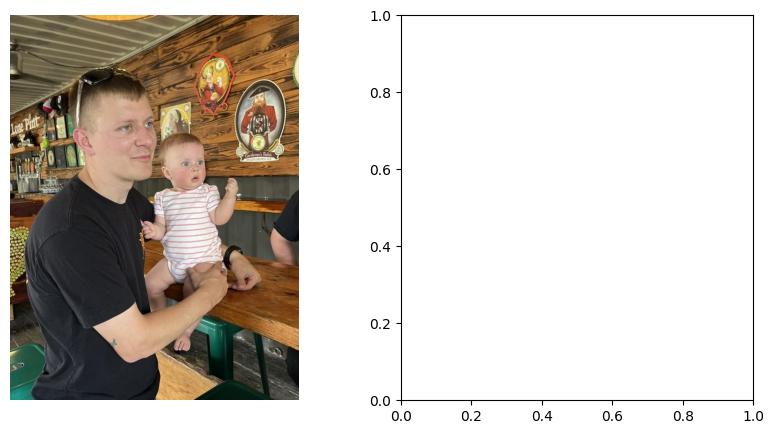

In [18]:
for picture in pictures:
    _ = swap_n_show_same_img(picture, app, swapper)

# Corrected: swap 2 faces in 1 images

In [19]:
def swap_n_show_same_img(img_fn,
                         app,
                         swapper,
                         plot_before=False,
                         plot_after=True):
    img=cv2.imread(img_fn)
    
    if plot_before: 
        fig, axs = plt.subplots(1, figsize=(5,5))
        axs.imshow(img[:,:,::-1])
        axs.axis('off')
        plt.show()
    
    faces = app.get(img)
    if len(faces) != 2:
        print("The image should contain exactly 2 faces. Found {} faces.".format(len(faces)))
        return None, None

    face1, face2 = faces[0], faces[1]
    
    img_ = img.copy()

    if plot_after:
        img_ = swapper.get(img_, face1, face2, paste_back=True)
        img_ = swapper.get(img_, face2, face1, paste_back=True)
        fig, axs = plt.subplots(1, figsize=(10,5))
        axs.imshow(img_[:,:,::-1])
        axs.axis('off')
        plt.show()
        
    return img_


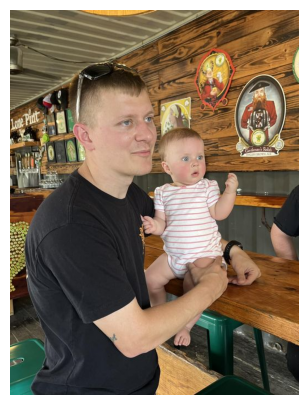

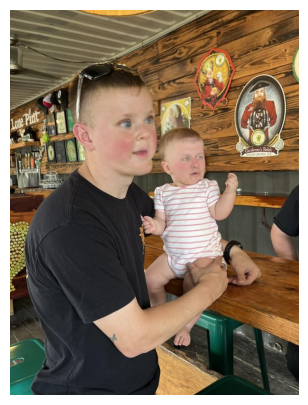

In [20]:
swapped_img = swap_n_show_same_img('troy_and_baby.jpeg', app, swapper, plot_before=True, plot_after=True)


# Save output in High Resolution

In [21]:
from PIL import Image

# Convert from OpenCV image format to PIL image format
swapped_img_pil = Image.fromarray(cv2.cvtColor(swapped_img, cv2.COLOR_BGR2RGB))

# Save the image with a specific quality level
swapped_img_pil.save('output.jpg', 'JPEG', quality=100)